## Before Preparation

In [2]:
import zipfile

with zipfile.ZipFile("Project_cod.zip", "r") as zip_ref:
    zip_ref.extractall("")

In [9]:
%pip install torch -qqq
%pip install numpy -qqq
%pip install torchtext -qqq
%pip install tqdm -qqq
%pip install tokenizers -qqq
%pip install matplotlib -qqq
%pip install prettytable -qqq
%pip install transformers -qqq
%pip install cyrtranslit -qqq
%pip install torchmetrics -qqq
%pip install transformers -qqq

## Train

In [7]:
%load_ext autoreload
%autoreload 2

In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
from distutils.dir_util import copy_tree

import torch
import yaml

In [3]:
import pre_train_seq2seq_transformer as ptst  # pre_train, train
from src import utils  # pre_graf, graf

In [4]:
from imp import reload

In [8]:
reload(ptst)

<module 'pre_train_seq2seq_transformer' from '/home/jupyter/work/resources/pre_train_seq2seq_transformer.py'>

In [9]:
reload(utils)

<module 'src.utils' from '/home/jupyter/work/resources/src/utils.py'>

In [ ]:
1 + 1

## pre_train

In [4]:
name_exp = "wikisql_pre_train"


def callback(model):
    pass
    # torch.save(model.state_dict(), "save_model_pre_train_"+name_exp+".pt")

In [ ]:
model, dm, dataloader = ptst.pre_train(
    prin=True, filename="progress_log_" + name_exp + ".txt"
)

In [6]:
torch.save(model.state_dict(), "save_model_pre_train_" + name_exp + ".pt")

In [7]:
data_config = yaml.load(
    open("configs/data_config.yaml", "r", encoding="utf-8"), Loader=yaml.Loader
)

+-----------------+-----------------+
|    параметры    |     значения    |
+-----------------+-----------------+
| pre_train_model | bert-base-cased |
|  learning_rate  |      0.0001     |
|    sched_step   |        20       |
|   sched_gamma   |     0.33333     |
|    epoch_num    |        30       |
|  try_one_batch  |      False      |
+-----------------+-----------------+


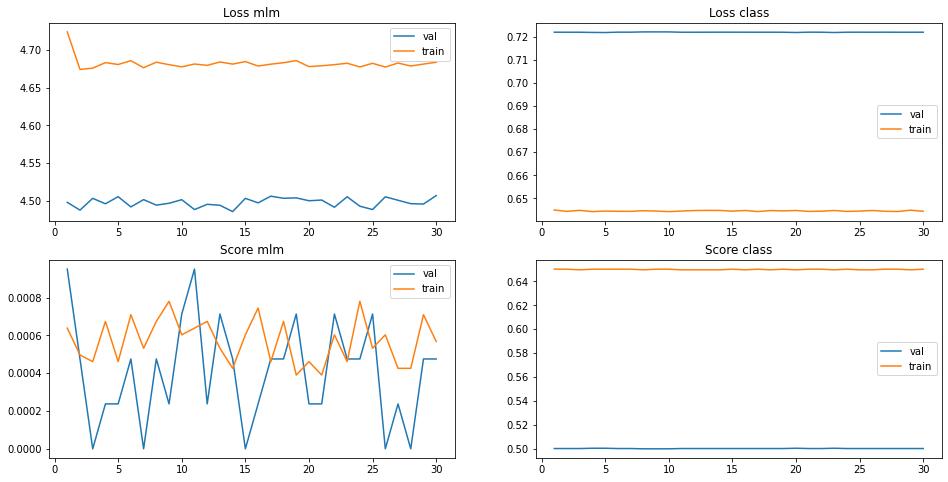

In [8]:
utils.pre_graf(
    data_config["path_repository"]
    + "pre_training_logs/progress_log_wikisql_pre_train.txt"
)

## train

In [ ]:
name_exp = "wikisql_train"
model, dm, dataloader = ptst.train(
    prin=True, filename="progress_log_" + name_exp + ".txt"
)

In [5]:
torch.save(model.state_dict(), "save_model_train_" + name_exp + ".pt")

In [4]:
data_config = yaml.load(
    open("configs/data_config.yaml", "r", encoding="utf-8"), Loader=yaml.Loader
)

+-----------------+-----------------+
|    параметры    |     значения    |
+-----------------+-----------------+
| pre_train_model | bert-base-cased |
|  learning_rate  |      1e-05      |
|    sched_step   |        30       |
|   sched_gamma   |       0.1       |
|    epoch_num    |        30       |
|  try_one_batch  |      False      |
+-----------------+-----------------+


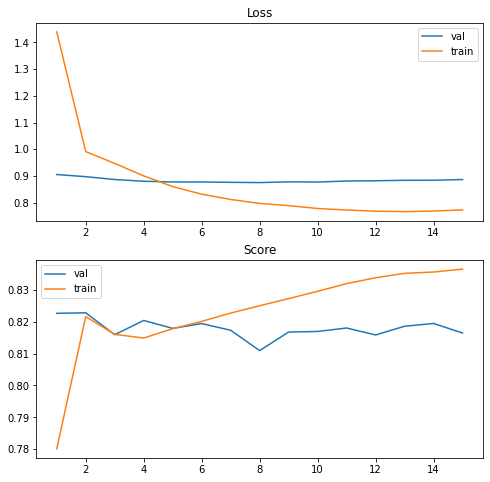

In [5]:
utils.graf(
    data_config["path_repository"] + "training_logs_/progress_log_wikisql_train.txt"
)

+-----------------+-----------------+
|    параметры    |     значения    |
+-----------------+-----------------+
| pre_train_model | bert-base-cased |
|  learning_rate  |      1e-05      |
|    sched_step   |        30       |
|   sched_gamma   |       0.1       |
|    epoch_num    |        30       |
|  try_one_batch  |      False      |
+-----------------+-----------------+


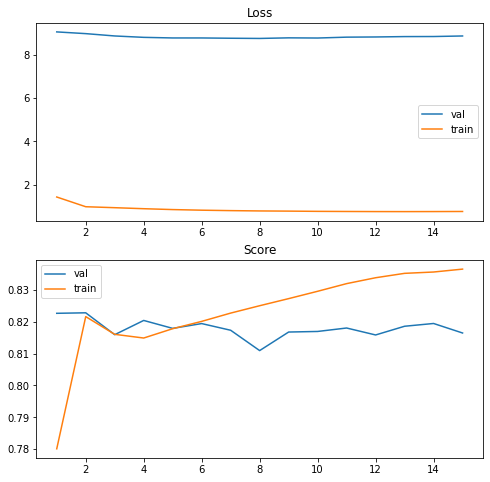

In [7]:
utils.graf(
    data_config["path_repository"] + "training_logs_/progress_log_wikisql_train.txt"
)

+-----------------+-------------------------+
|    параметры    |         значения        |
+-----------------+-------------------------+
| pre_train_model | FacebookAI/roberta-base |
|  learning_rate  |          0.0001         |
|    sched_step   |            30           |
|   sched_gamma   |           0.1           |
|    epoch_num    |            30           |
|  try_one_batch  |          False          |
+-----------------+-------------------------+


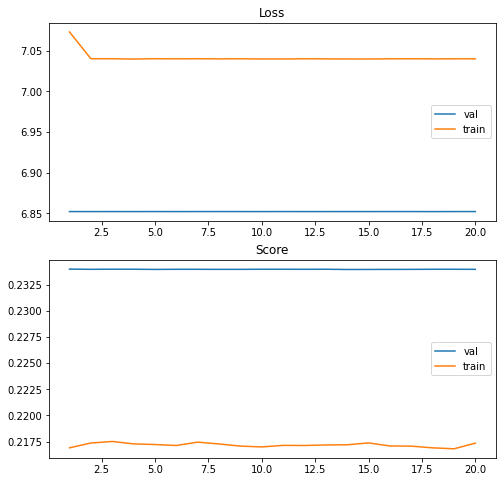

In [11]:
utils.graf(
    data_config["path_repository"] + "training_logs_/progress_log_wikisql_train.txt"
)

+-----------------+-------------------------+
|    параметры    |         значения        |
+-----------------+-------------------------+
| pre_train_model | FacebookAI/roberta-base |
|  learning_rate  |          8e-06          |
|    sched_step   |            30           |
|   sched_gamma   |           0.1           |
|    epoch_num    |            30           |
|  try_one_batch  |          False          |
+-----------------+-------------------------+


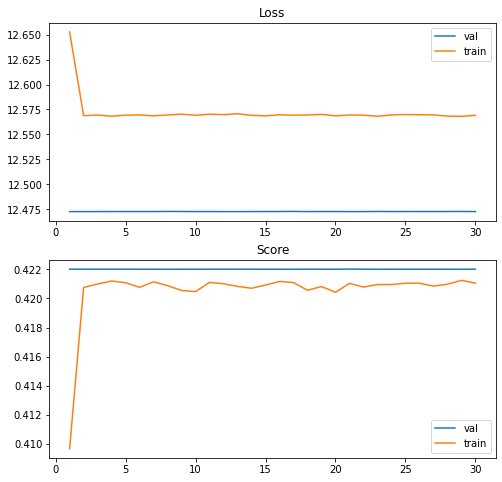

In [7]:
utils.graf(
    data_config["path_repository"] + "training_logs_/progress_log_wikisql_train.txt"
)

+-----------------+-----------------+
|    параметры    |     значения    |
+-----------------+-----------------+
| pre_train_model | bert-base-cased |
|  learning_rate  |      1e-05      |
|    sched_step   |        30       |
|   sched_gamma   |       0.1       |
|    epoch_num    |        30       |
|  try_one_batch  |      False      |
+-----------------+-----------------+


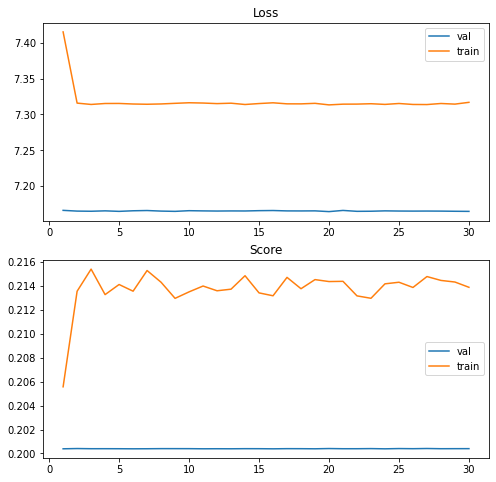

In [8]:
utils.graf(
    data_config["path_repository"] + "training_logs_/progress_log_wikisql_train.txt"
)

+-----------------+-----------------+
|    параметры    |     значения    |
+-----------------+-----------------+
| pre_train_model | bert-base-cased |
|  learning_rate  |      1e-05      |
|    sched_step   |       300       |
|   sched_gamma   |       0.1       |
|    epoch_num    |       300       |
|  try_one_batch  |       True      |
+-----------------+-----------------+


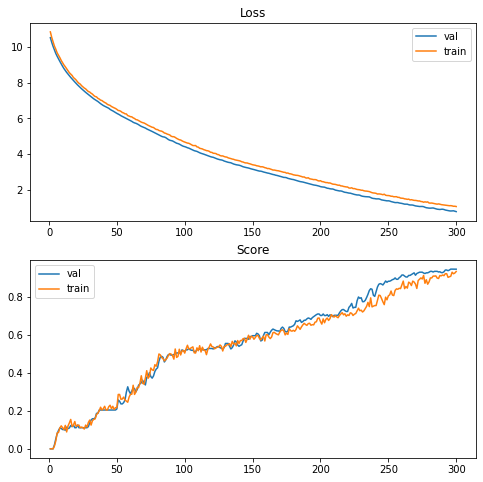

In [ ]:
utils.graf(
    data_config["path_repository"] + "training_logs_/progress_log_wikisql_train.txt"
)

In [ ]:
for batch in dataloader[0]:

    predicted_samples = model.forward_generation(batch)

    _, actual_sentences, predicted_sentences = model.eval_str(
        predicted_samples, batch[2]
    )

    for a, b in zip(actual_sentences[:5], predicted_sentences[:5]):
        print(f"{a} ---> \n{b}")
    print("##############################")
    break

In [15]:
for batch in dataloader[1]:

    predicted_samples = model.forward_generation(batch)

    _, actual_sentences, predicted_sentences = model.eval_str(
        predicted_samples, batch[2]
    )

    for a, b in zip(actual_sentences[:5], predicted_sentences[:5]):
        print(f"{a} ---> \n{b}")
    print("##############################")
    break

SELECT Home_captain FROM table WHERE Result = STR_VALUE_1 [SEP]                                                                                                                                                                 ---> 
SELECT FROM FROM table WHERE = = STR_VALUE_1 [SEP] = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = =
SELECT Ipsos_5/25/09 FROM table WHERE TNS-Sofres_5/28/09 = STR_VALUE_1 [SEP]                                                                                                                                                                 ---> 
SELECT FROM FROM table WHERE = = STR_VALUE_1 [SEP] = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = =

In [4]:
import math

import numpy as np
from torchmetrics.classification import Accuracy
from tqdm.notebook import tqdm

In [35]:
model, dm, dataloader = ptst.get_model("save_model_train_" + "wikisql_train" + ".pt")

DEVICE = cuda


Pars data: 100%|██████████| 8420/8420 [00:00<00:00, 1984158.64it/s]


In [6]:
def predict(batch, max_len=34):
    src_data, attention_mask, _, _ = batch
    #  https://towardsdatascience.com/a-detailed-guide-to-pytorchs-nn-transformer-module-c80afbc9ffb1
    trg_data = (
        torch.ones(src_data.size(0), 1)
        .fill_(model.tokenizer.tokenizer.cls_token_id)
        .type(torch.long)
        .to(model.device)
    )
    model.eval()

    for i in range(max_len):
        src = src_data.clone()
        trg = trg_data.clone()
        if model.trg_mask.size(0) != trg.size(1):
            model.trg_mask = model.generate_square_subsequent_mask(trg.size(1), 0)

        emb_trg = model.pos_encoding(model.embedding_trg(trg) * math.sqrt(768)).permute(
            1, 0, 2
        )

        hid_src = model.model(
            input_ids=src, attention_mask=attention_mask
        ).last_hidden_state.permute(1, 0, 2)

        predicted = model.decoder(
            emb_trg,
            hid_src,
            tgt_mask=model.trg_mask,
            memory_key_padding_mask=attention_mask,
        )
        predicted = model.linear_src(predicted[-1:, :, :]).permute(1, 0, 2)

        topi = torch.argmax(predicted, dim=-1)
        trg_data = torch.cat((trg_data, topi.reshape((-1, 1))), dim=1)

    return trg_data.clone()

In [31]:
for batch in dataloader[1]:
    metric = Accuracy(
        task="multiclass", num_classes=len(model.tokenizer), ignore_index=-1
    )

    predicted_samples = predict(batch, 169)
    print("-----")

    for a, b in tqdm(zip(batch[2][:5], predicted_samples[:5])):
        predicts = np.where(
            a.cpu() != model.tokenizer.tokenizer.pad_token_id, a.cpu(), -1
        )
        labels = np.where(
            a.cpu() != model.tokenizer.tokenizer.pad_token_id, b.cpu(), -1
        )
        print(float(metric(torch.tensor(predicts), torch.tensor(labels))))
        print(f"{model.tokenizer.decode(a)} --->\n {model.tokenizer.decode(b)}")
        print("##############################")
    break

-----


0it [00:00, ?it/s]

0.13333334028720856
[CLS] SELECT AVG Avg/G FROM table WHERE Name = STR_VALUE_1 AND Gain > NUM_VALUE_2 [SEP]                                                                                                                                                            --->
 [CLS] SELECT Name FROM table WHERE Name = STR_VALUE_1 AND Name = STR_VALUE_2 [SEP] > NUM_VALUE_3 [SEP] > NUM_VALUE_3 [SEP] > NUM_VALUE_3 [SEP] > NUM_VALUE_3 [SEP] > NUM_VALUE_3 [SEP] > NUM_VALUE_3 [SEP] > NUM_VALUE_3 [SEP] > NUM_VALUE_3 [SEP] > NUM_VALUE_3 [SEP] > NUM_VALUE_3 [SEP] > NUM_VALUE_3 [SEP] > NUM_VALUE_3 [SEP] > NUM_VALUE_3 [SEP] > NUM_VALUE_3 [SEP] > NUM_VALUE_3 [SEP] > NUM_VALUE_3 [SEP] > NUM_VALUE_3 [SEP] > NUM_VALUE_3 [SEP] > NUM_VALUE_3 [SEP] > NUM_VALUE_3 [SEP] > NUM_VALUE_3 [SEP] > NUM_VALUE_3 [SEP] > NUM_VALUE_3 [SEP] > NUM_VALUE_3 [SEP] > NUM_VALUE_3 [SEP] > NUM_VALUE_3 [SEP] > NUM_VALUE_3 [SEP] > NUM_VALUE_3 [SEP] > NUM_VALUE_3 [SEP] > NUM_VALUE_3 [SEP] > NUM_VALUE_3 [SEP] > NUM_VALUE_3 [SEP] > NUM_VA

In [ ]:
for batch in dataloader[1]:
    metric = Accuracy(
        task="multiclass", num_classes=len(model.tokenizer), ignore_index=-1
    )

    predicted_samples = predict(batch, 169)
    print("-----")

    for a, b in tqdm(zip(batch[2][:5], predicted_samples[:5])):
        predicts = np.where(
            a.cpu() != model.tokenizer.tokenizer.pad_token_id, a.cpu(), -1
        )
        labels = np.where(
            a.cpu() != model.tokenizer.tokenizer.pad_token_id, b.cpu(), -1
        )
        print(float(metric(torch.tensor(predicts), torch.tensor(labels))))
        print(f"{model.tokenizer.decode(a)} --->\n {model.tokenizer.decode(b)}")
        print("##############################")
    break

In [ ]:
val_epoch_loss, val_score_batch = 0, 0
model.eval()
i = 0
metric = Accuracy(
    task="multiclass", num_classes=len(model.tokenizer), ignore_index=-1
)
for batch in tqdm(dataloader[1]):
    X_tensor, _, Y_tensor, _ = batch
    decoder_outputs = model.forward_generation(batch) # predict(batch, 169)
    decoder_outputs = decoder_outputs.reshape(-1, decoder_outputs.size(-1))
    labels = Y_tensor[:, 1:].reshape(-1) # 
    labels = torch.where(labels != model.tokenizer.tokenizer.pad_token_id, labels, -100)
    loss = model.loss_tok(decoder_outputs*10, labels)

    val_epoch_loss += loss.item()

    predicted_samples = predict(batch, 169)
    val_score_batch_one_epoch = 0
    for a, b in tqdm(zip(batch[2][:], predicted_samples[:])):
        predicts = np.where(
            a.cpu() != model.tokenizer.tokenizer.pad_token_id, a.cpu(), -1
        )
        labels = np.where(
            a.cpu() != model.tokenizer.tokenizer.pad_token_id, b.cpu(), -1
        )
        val_score_batch_one_epoch += float(metric(torch.tensor(predicts), torch.tensor(labels)))
        print(f"{model.tokenizer.decode(a)} --->\n {model.tokenizer.decode(b)}")
        print("##############################")
    val_score_batch_one_epoch = val_score_batch_one_epoch / len(batch[2][:])
    val_score_batch += val_score_batch_one_epoch

#     mask_score, actual_sentences, predicted_sentences = model.eval_str(predicted_samples, batch[2])
#     val_score_batch += mask_score
    
#     for a, b in zip(actual_sentences[:5], predicted_sentences[:5]):
#         print(f"{a} --->\n {b}")
#         print('##############################')
    i+=1
    if i == 10:
        break

val_epoch_loss = val_epoch_loss / i
val_score_batch = val_score_batch / i

In [ ]:
sum(p.numel() for p in model.parameters())

+-----------------+-----------------+
|    параметры    |     значения    |
+-----------------+-----------------+
| pre_train_model | bert-base-cased |
|  learning_rate  |      1e-05      |
|    sched_step   |       200       |
|   sched_gamma   |       0.1       |
|    epoch_num    |       200       |
|  try_one_batch  |       True      |
+-----------------+-----------------+


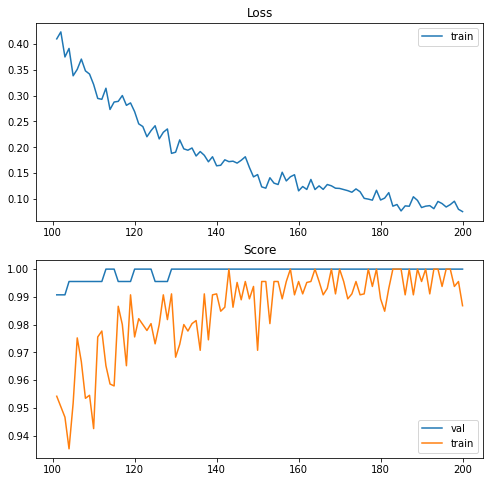

In [22]:
import ast

from matplotlib import pyplot as plt
from prettytable import PrettyTable

path = data_config["path_repository"] + "training_logs_/progress_log_wikisql_train.txt"
data_graf = {"loss_val": [], "loss_train": [], "val_score": [], "train_score": []}

lebes = list(data_graf.keys())

with open(path, "r") as f:
    description_model = f.readline()
    for lin in f:
        line = ast.literal_eval(lin)
        for leb in lebes:
            data_graf[leb].append(line[leb])

description_model = ast.literal_eval(description_model)

table_print = PrettyTable()
table_print.field_names = ["параметры", "значения"]

for i in description_model:
    table_print.add_row((i, description_model[i]))

print(table_print)

fig, (ax1, ax2) = plt.subplots(2, 1)

fig.set_size_inches(8, 8, forward=True)

sep = 100
x = range(sep+1, len(data_graf[lebes[0]]) + 1)

ax1.title.set_text("Loss")
ax1.plot(x, data_graf["loss_val"][sep:], label="val")
ax1.plot(x, data_graf["loss_train"][sep:], label="train")
ax1.legend()

ax2.title.set_text("Score")
ax2.plot(x, data_graf["val_score"][sep:], label="val")
ax2.plot(x, data_graf["train_score"][sep:], label="train")
ax2.legend()

plt.show()

In [26]:
print(val_epoch_loss, val_score_batch)

8.900948705782001 0.8196293326526767
